# UCI Heart Disease Dataset

Welcome to my notebook! Here I will be visualizing the UCI Heart Disease dataset uploaded by user ''. I will be providing some exploratory analysis and attempt some machine learning on the dataset.
Please upvote if you find it useful at all and leave me a comment if you have anything you'd like to add!

### Some things we'll attempt to answer:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
uci = pd.read_csv('heart.csv')
uci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


age: age in years
sex: (1 = male; 0 = female)
cpchest: pain type
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
cholserum: cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
target: 1 or 0

In [6]:
# 303 observations, all numerical values. Off to a good start
uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# average age of 54.366. Definitely not spring chickens.
uci.age.mean()

54.366336633663366

In [9]:
# our youngest observation is 29 years old and our oldest is 77. a solid range.
# std of a little over 9 years, with nice percentiles. 50% is 55 exactly, coinciding nicely with our mean.
uci.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [12]:
##uci.pivot_table(index='age')

In [3]:
uci.oldpeak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

## Data Visualization

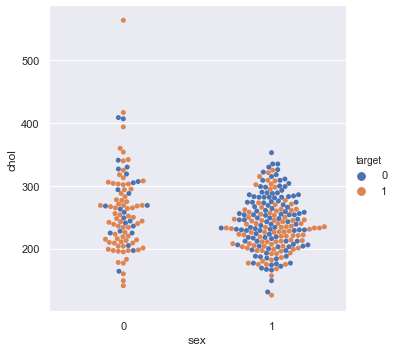

In [7]:
sns.catplot(data = uci, x = 'sex', y = 'chol', hue = 'target',
            kind = "swarm")

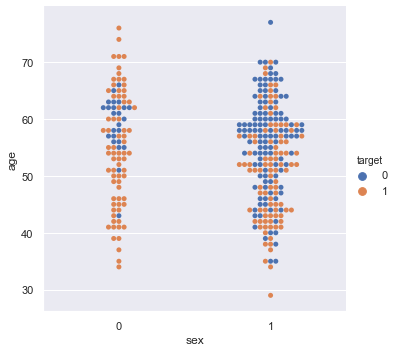

In [8]:
# Youngest patient (Man aged 29) has heart disease while oldest patient (Man aged 77) does not. 
# Majority of women without heart disease are between the ages of 55 and 64 

sns.catplot(data = uci, x = 'sex', y = 'age', hue = 'target',
            kind = "swarm")

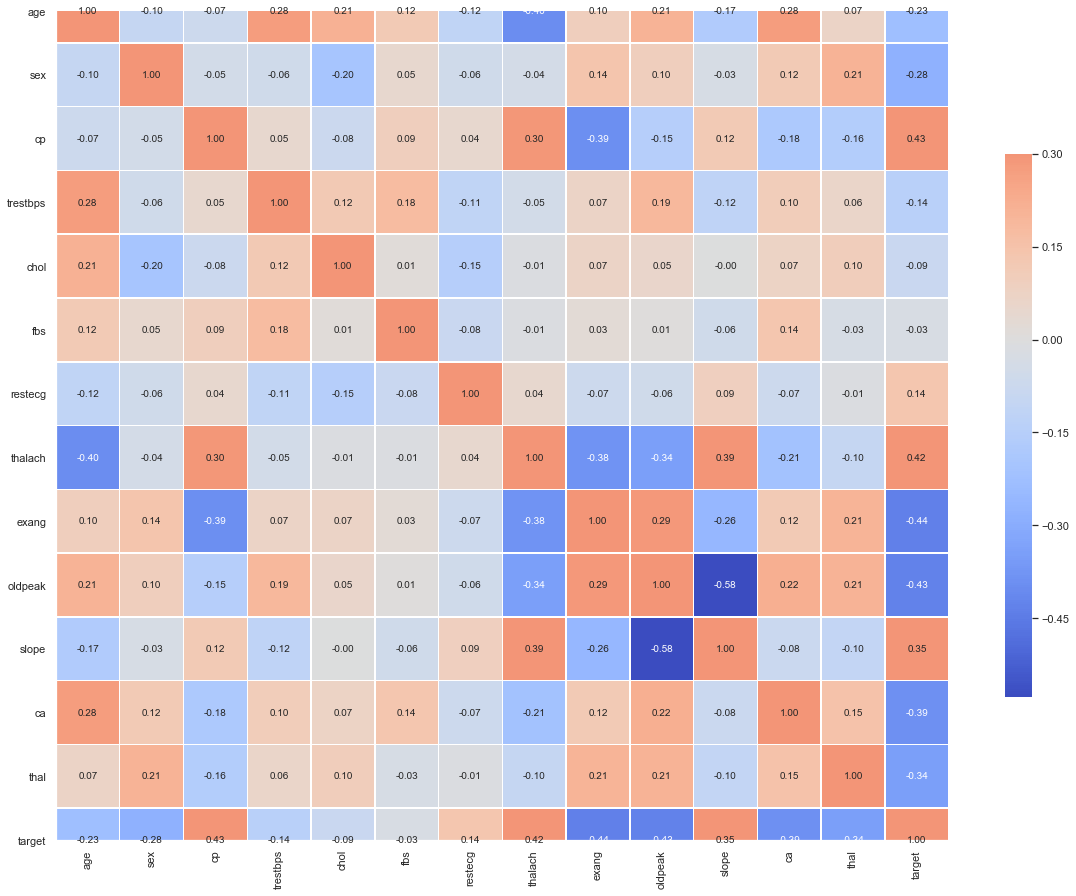

In [4]:
corr = uci.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(20,20)
    
plt.show()